# Caso Práctico de Módulo 1: Optimización de campañas de markeing online



* Supongamos el caso en el que tenemos que hacer una campaña de marketing online para promocionar un determinado producto. Para ello se mostrará en una página web un banner con una imagen del producto a promocionar. El equipo de diseño ha realizado 5 imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto a promocionar:

<img src="../imgs/img_mo.png" style="width: 700px;"/>

* Dado que no sabemos a priori cual es la imagen del producto que captará mayor atención, debemos de aprender en base a los clicks que se realizan sobre el banner que imagen será las más llamativa y conseguirá más visitas. Para ello aplicaremos el método del Bandido Multi-Brazo con el fin maximizar las visitas a la web del producto a promocionar.

$$Q(imagen_i) = \frac{Nº Clicks}{Nº impresiones de la pagina}$$

* El ***objetivo es encontrar la imagen que capte mayor atención a los usuarios***; es decir que mayor número de clicks obtenga:

$$Q(imagen^{*}) = max Q(imagen_i)$$


* Dado el método a continuación implementado "multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)" se pide llamar a este método pasandole un ratio de exploración adecuado (epsilon) para que encuentre la imagen que mayor número de clicks tiene.


In [1]:
import random
import numpy as np

   
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = [0.7, 0.01, 0.04, 0.1, 0.05]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit


### Ratio de Exploración EPSILON:


* Modificando la constante "EPSILON" que es el ratio de exploración se pide:


1. Cual es el valor de EPSILON que maximiza la imagen con mayor número de clicks
    + ***RESPUESTA***: Se obtiene que el mejor valor de EPSILON es 0.1. Con un ratio de explotación del 90% conseguimos maximizar la imagen con mayor número de clicks. Por lo que se puede concluir que 0.1 sería el correcto, o el que se encuentre comprendido entre 0.05-0.2 .


2. Cual es la imagen que más clicks obtiene y cuantos:
    + ***RESPUESTA***: Con un EPSILON DE 0.1, se obtiene que la imagen que más clicks obtiene es la imagen A (la 0, en nuestro gráfico). con un total de aproximadamente 600 clicks.


3. Poniendo un ratio de explotación del 100% que resultado obtenemos:
    + ***RESPUESTA***: Un ratio de explotación del 100% corresponde con un epsilon =0. Vemos que no llegamos a explotar la información que tenemos si no, que siempre se muestra la misma imagen (la primera que ha obtenido un click) se obtiene un valor de q_bandits bajo. Llama la atención que la imagen que se obtiene como resultado es la D (3 en nuestra gráfica) con un numero de clicks en torno a 100. Esta es la imagen que primero recibe la recomponsa.
    

Initial Bandits Distribution
  [0.7, 0.01, 0.04, 0.1, 0.05]
Bandits Distribution games
  [812. 131.  15.  18.  24.]
Q(a) Bandits
  [0.7167 0.0382 0.0667 0.0556 0.    ]
CLICKS: 589


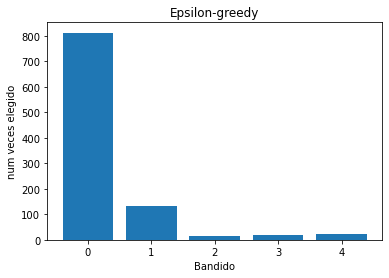

In [2]:
EPSILON = 0.1# TODO

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Initial Bandits Distribution
  [0.7, 0.01, 0.04, 0.1, 0.05]
Bandits Distribution games
  [  0.   1.   0. 999.   0.]
Q(a) Bandits
  [0.     0.     0.     0.1111 0.    ]
CLICKS: 111


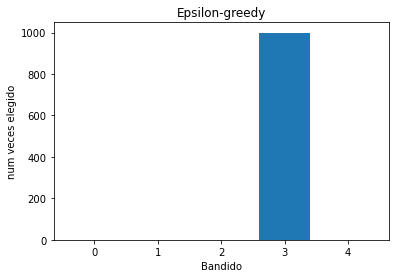

In [3]:
EPSILON = 0 # TODO

import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()